In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-air-quality-data/data.csv


a_r = 0.0
b_r = 0.6


/tmp/ipykernel_55/3751232549.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/india-air-quality-data/data.csv",encoding="latin1")



MLE Estimates:
mu = 25.809622897811263
var = 342.36339017375917
lambda = 0.001460436525489001
c = 0.021560876239314918


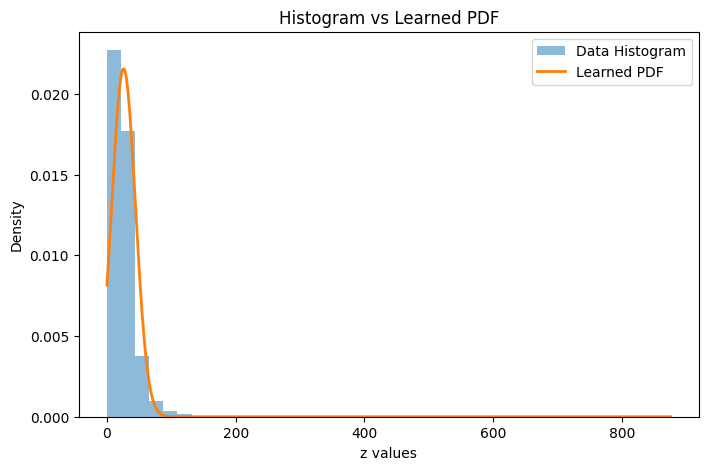

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

r = 102316041
a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)
print("a_r =", a_r)
print("b_r =", b_r)

df = pd.read_csv("/kaggle/input/india-air-quality-data/data.csv",encoding="latin1")
x = df["no2"].dropna().values
z = x + a_r * np.sin(b_r * x)

mu_est = np.mean(z)
var = np.var(z)

lambda_est = 1 / (2 * var)
c_est = np.sqrt(lambda_est / np.pi)

print("\nMLE Estimates:")
print("mu =", mu_est)
print("var =", var)
print("lambda =", lambda_est)
print("c =", c_est)

z_range = np.linspace(min(z), max(z), 500)
pdf = c_est * np.exp(-lambda_est * (z_range - mu_est)**2)
plt.figure(figsize=(8,5))
plt.hist(z, bins=40, density=True, alpha=0.5, label="Data Histogram")
plt.plot(z_range, pdf, linewidth=2, label="Learned PDF")
plt.xlabel("z values")
plt.ylabel("Density")
plt.title("Histogram vs Learned PDF")
plt.legend()
plt.show()